In [124]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import pandas as pd
import incense
from incense import ExperimentLoader
from pathlib import Path
from incense.experiment_loader import FileSystemExperimentLoader

basedir = Path("../logs/")
loader = FileSystemExperimentLoader(basedir)
loader

FileSystemExperimentLoader("../logs")

In [125]:
exp.config
#float(exp.metrics['test.accuracy'])

pmap({'name': 'MultiNomNB__min_df_.003_path_pos_trigrams', 'naivebayes': pmap({'name': 'MultinomialNB', 'alpha': 0.0005}), 'dataset': pmap({'name': '100 author 50 docs each pos_tags', 'feature_column': 'path_pos_trigrams', 'min_doc_freq': 0.003, 'filename': './data/100A50D__doc+pos.pkl'}), 'seed': 625019188})

,review_contents,pos_tags,nested_pos_bigrams,path_pos_bigrams,path_pos_trigrams
0.0001,0.564000,0.398667,0.319333,0.390667,0.273333
0.0002,0.588000,0.441333,0.350000,0.428000,0.303333
0.0003,0.601333,0.460000,0.370000,0.454667,0.330667
0.0005,0.623333,0.495333,0.399333,0.494667,0.359333


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path


In [127]:

# Hack: only run this cell _after_ generating some other graph first.
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [128]:
def read_pkl(fname): return pd.read_pickle(RESULTS_DIR/fname)
def plot(dataframe, title="Title", xlabel="xlabel", ylabel="ylabel"):
    graph = dataframe.rename(columns={"review_contents": "review contents", "pos_tags": "POS tags L0", "path_pos_bigrams": "POS paths L1", "nested_pos_bigrams" : 'POS nested pairs', 'path_pos_trigrams': 'POS paths L3'}).plot(title=title)
    graph.set_xlabel(xlabel)
    graph.set_ylabel(ylabel)
    return graph


In [153]:
start = 447
end = 466
df = pd.DataFrame()
for i in range(start,end+1):
    exp = loader.find_by_id(i)
    cfg = exp.config
    feat = cfg['dataset']['feature_column']
    alpha = cfg['naivebayes']['alpha']
    df.loc[alpha, feat] = exp.result.value
df

,review_contents,pos_tags,nested_pos_bigrams,path_pos_bigrams,path_pos_trigrams
0.0001,0.564000,0.398667,0.319333,0.390667,0.273333
0.0002,0.588000,0.441333,0.350000,0.428000,0.303333
0.0003,0.601333,0.460000,0.370000,0.454667,0.330667
0.0005,0.623333,0.495333,0.399333,0.494667,0.359333


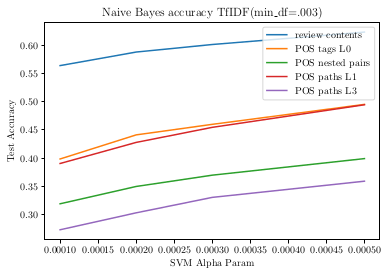

In [154]:
plot(df, title="Naive Bayes accuracy TfIDF(min\_df=.003)", xlabel="SVM Alpha Param", ylabel="Test Accuracy")

